                        Uncovering Factors Influencing Product Sales In Retail Stores
Conducted EDA (exploratory data analysis), and implemented advanced feature engineering techniques, feature 
selection using Pandas to identify factors affecting product sales across retail stores, ultimately preparing the data for 
predictive modeling.

Hypothesis Generation:

Brain storming all the factors that coud answer the problem statement.

1.Store Level Hypothesis
-Store location       : Urban or Tier 1 cities likely yield higher sales due to greater income levels.
-Population density   : Stores in densely populated areas generally see increased demand and higher sales.


2.Product Level Hypothesis:
-Utility                       : Everyday products have high demand and sales.
-Display area(Item Visibility) : Products on prominent shelves catch attention and sell better.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\Bhavitha Redrouthu\Desktop\MSIT\Completed Courses\PDA\sales_train_data.csv')
test = pd.read_csv(r'C:\Users\Bhavitha Redrouthu\Desktop\MSIT\Completed Courses\PDA\sales_test_data.csv')
submission = pd.read_csv(r'C:\Users\Bhavitha Redrouthu\Desktop\MSIT\Completed Courses\PDA\sample_submission.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Features Description:

                                    Numerical features:
    -Item_Weight              : Weight of the product or item.
    -Item_Visibility          : The % of the total display area of all products in a store allocated to the particular product.
    -Item_MRP                 : Maximum Retail Price (list price) of the product
    -Outlet_Establishment_Year: The year in which the store was established.
    -Item_Outlet_Sales        : Sales of the product in a particular store. This is the target variable to be predicted.

                                    Categorical features:
    -Item_Identifier          : Unique product ID
    -Item_Fat_Content         : Whether the product is low fat or regular fat
    -Item_Type                : The category to which the product belongs.
    -Outlet_Identifier        : Unique store ID
    -Outlet_Size              : The size of the store
    -Outlet_Location_Type     : The type of city in which the store is located.
    -Outlet_Type              : Whether the outlet is just a grocery store or some sort of supermarket.

# Concatenated Train Data and Test Data

In [5]:
train_test_concatdf = pd.concat([train,test],ignore_index=True)
train_test_concatdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

# Plotting A Histogram To Visualize Target Variable - Item_Outlet_Sales 

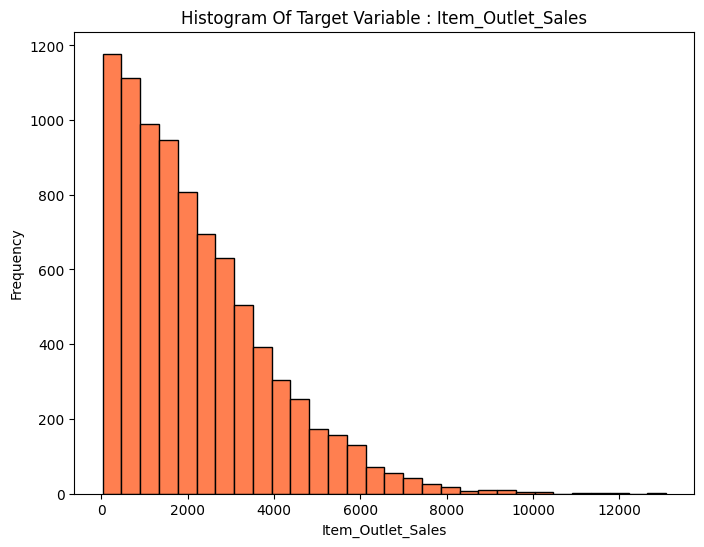

In [6]:
plot.figure(figsize=(8,6))
plot.hist(train_test_concatdf['Item_Outlet_Sales'],bins=30,color='coral',edgecolor='black')
plot.title('Histogram Of Target Variable : Item_Outlet_Sales')
plot.xlabel('Item_Outlet_Sales')
plot.ylabel('Frequency')
plot.show()

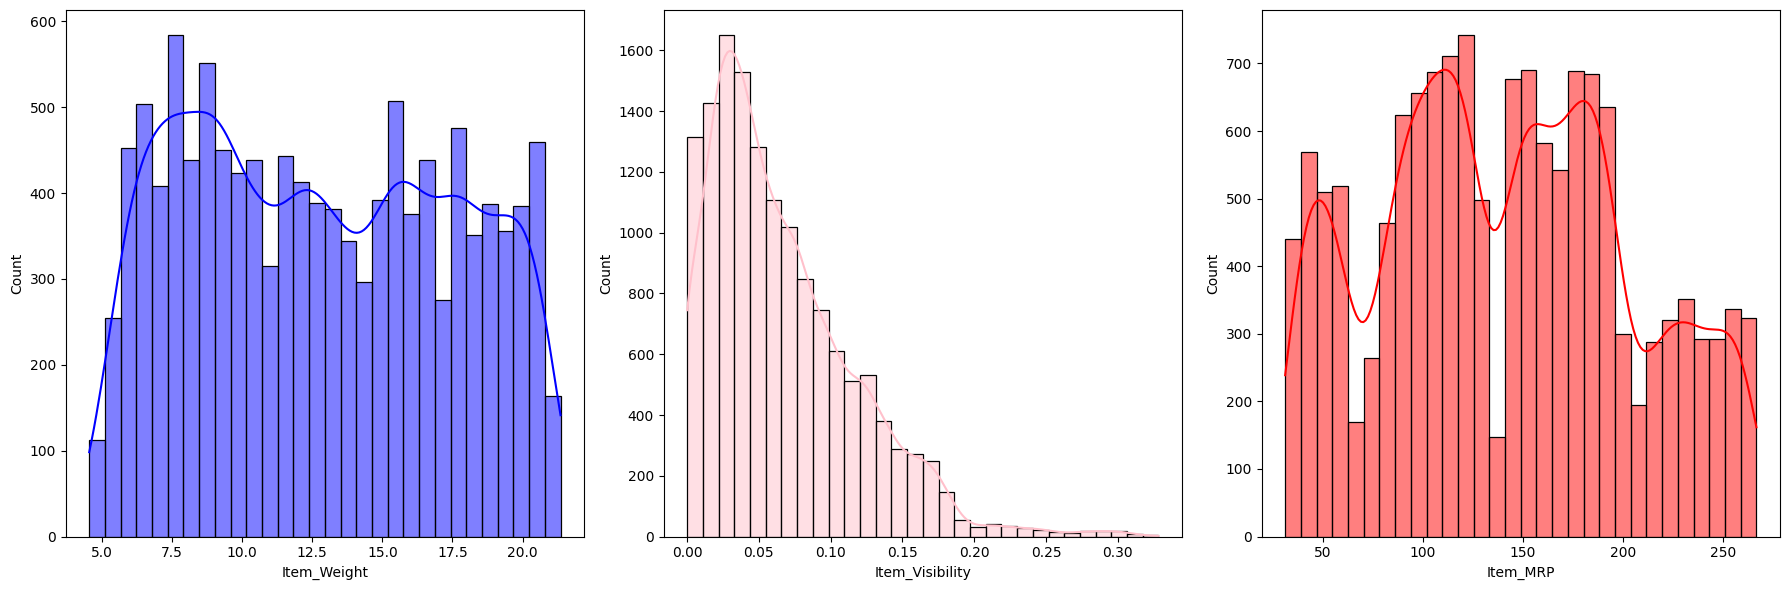

In [7]:
fig,axs = plot.subplots(1,3,figsize=(18,6))

sns.histplot(train_test_concatdf['Item_Weight'],bins=30,kde=True,color='blue',ax=axs[0])
axs[0].set_xlabel('Item_Weight')
axs[0].set_ylabel('Count')

sns.histplot(train_test_concatdf['Item_Visibility'],bins=30,kde=True,color='pink',ax=axs[1])
axs[1].set_xlabel('Item_Visibility')
axs[1].set_ylabel('Count')

sns.histplot(train_test_concatdf['Item_MRP'],bins=30,kde=True,color='red',ax=axs[2])
axs[2].set_xlabel('Item_MRP')
axs[2].set_ylabel('Count')

plot.tight_layout()
plot.show()

          From the above graphs , we can interpret :
                         The Item_Weight is normally distributed.They range from 5 kg to 20 kg ,
                         The Item_Visibility exhibits a skewed distribution ,
                         The Item_MRP can be grouped into four distinct clusters .

# Plotting Bar Graph To Visualize Item_Fat_Content

In [8]:
train_test_concatdf['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Before plotting, standardizing the various names into a consistent format. For example, "low fat," "LF," and "Low Fat" can all be replaced with "Low Fat."

In [9]:
train_test_concatdf.replace(
{
  'Item_Fat_Content':{    
  'LF'      : 'Low Fat',
  'low fat' : 'Low Fat',
  'reg'     : 'Regular'
  }
},inplace=True)

In [10]:
train_test_concatdf['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

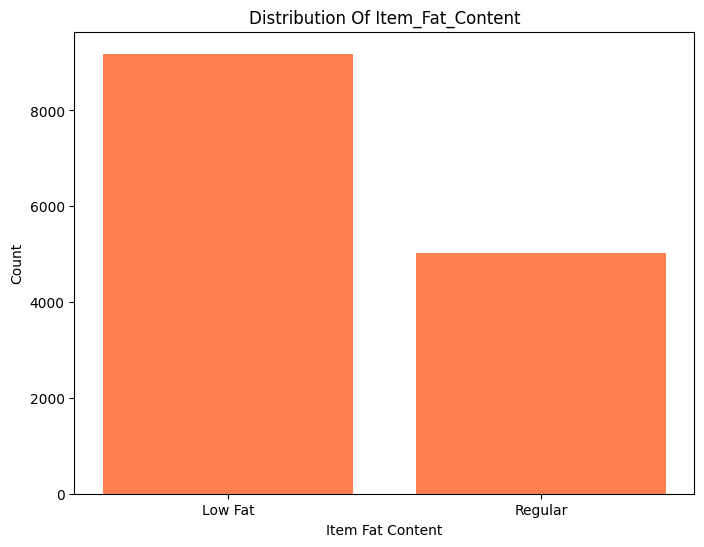

In [11]:
df =train_test_concatdf.groupby('Item_Fat_Content').size().reset_index(name='Count')
plot.figure(figsize=(8,6))
plot.bar(df['Item_Fat_Content'],df['Count'],color='coral')
plot.xlabel('Item Fat Content')
plot.ylabel('Count')
plot.title('Distribution Of Item_Fat_Content')
plot.show()

In [12]:
EDA_df= train_test_concatdf.merge(df,on='Item_Fat_Content',how='left')

In [13]:
EDA_df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
EDA_df.drop('Count',axis=1,inplace=True)

# Visualizing Item_Type, Outlet_Identifier,Outlet_Size

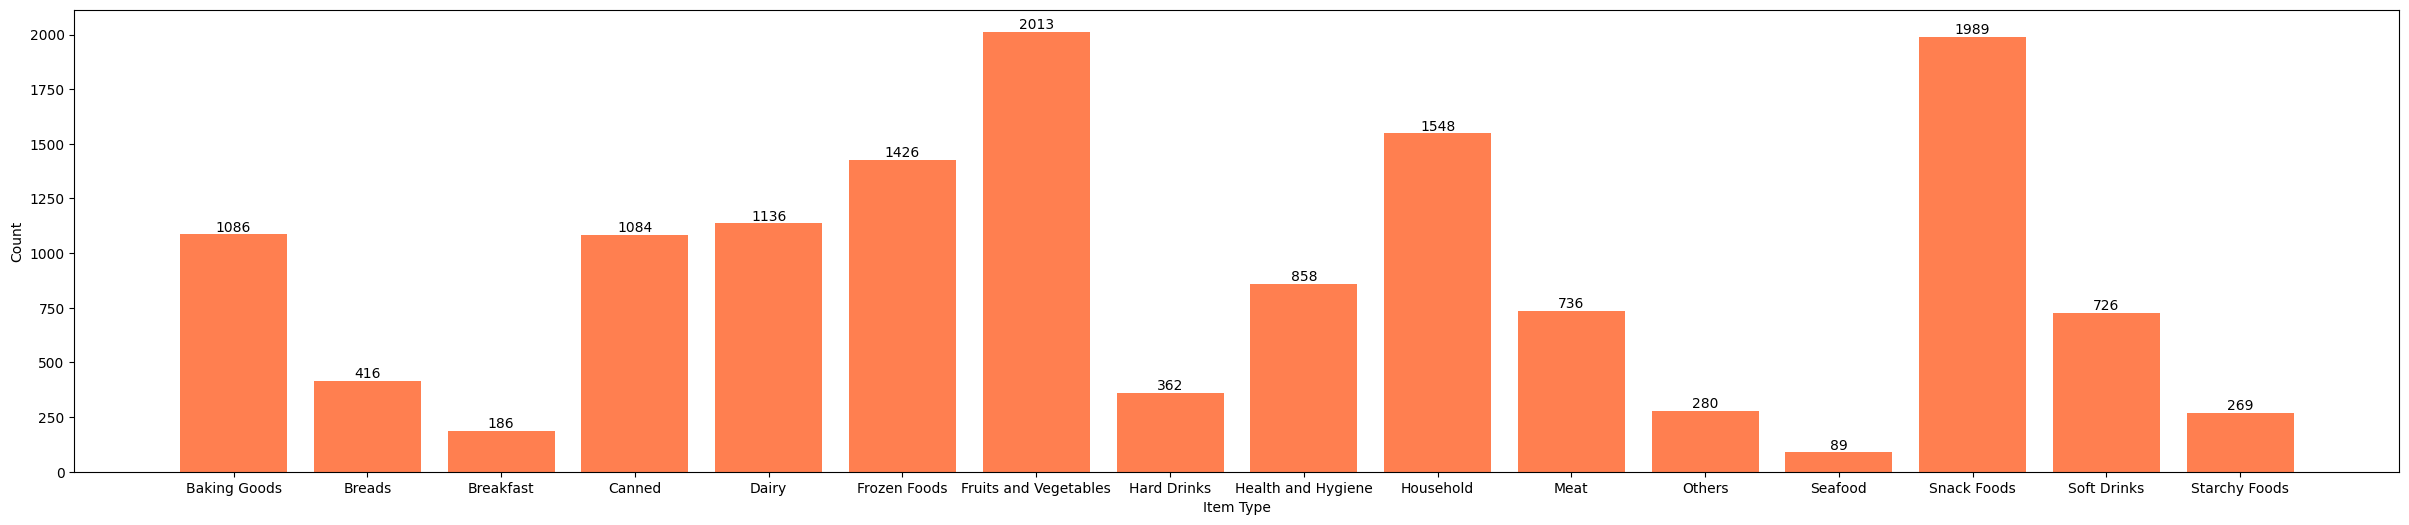

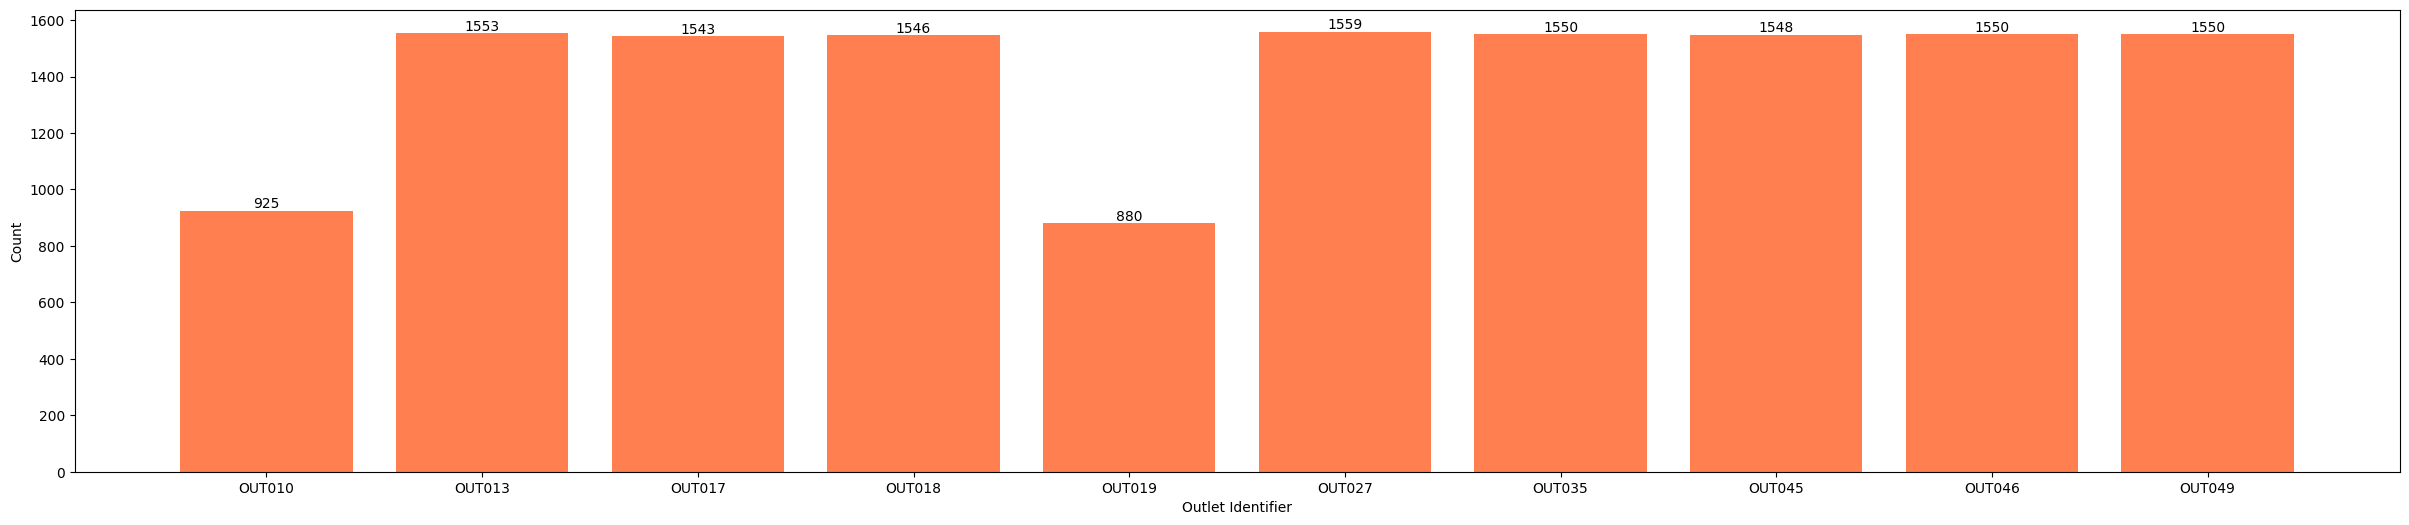

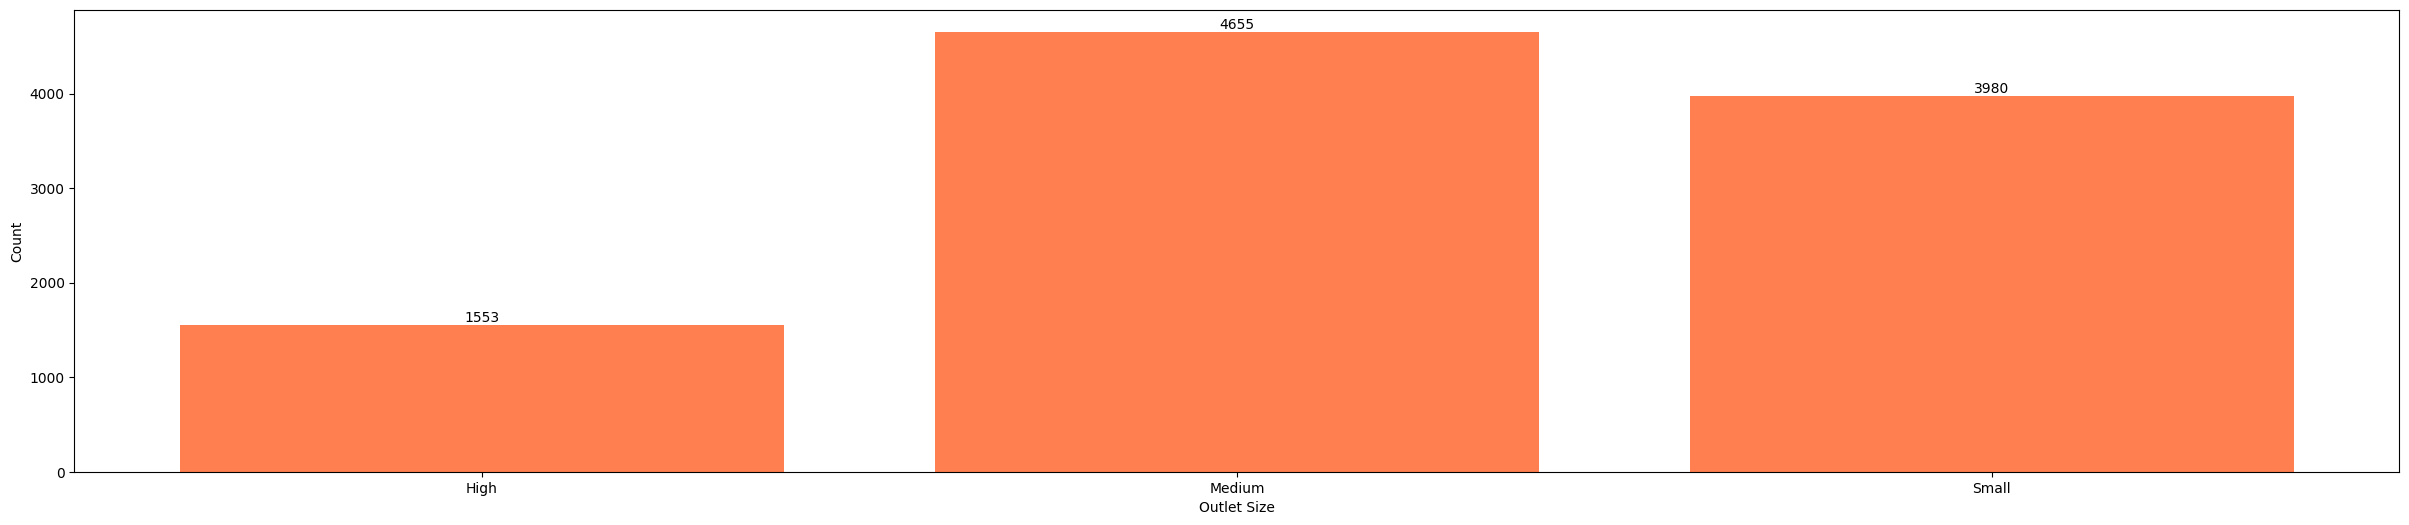

In [15]:
df =EDA_df.groupby('Item_Type').size().reset_index(name='Count')
fig,ax =plot.subplots(figsize=(30,6))
bars=ax.bar(df['Item_Type'],df['Count'],color='coral')
ax.bar_label(bars)
ax.set_xlabel('Item Type')
ax.set_ylabel('Count')
plot.show()

df =EDA_df.groupby('Outlet_Identifier').size().reset_index(name='Count')
fig,ax =plot.subplots(figsize=(30,6))
bars=ax.bar(df['Outlet_Identifier'],df['Count'],color='coral')
ax.bar_label(bars)
ax.set_xlabel('Outlet Identifier')
ax.set_ylabel('Count')
plot.show()

df =EDA_df.groupby('Outlet_Size').size().reset_index(name='Count')
fig,ax =plot.subplots(figsize=(30,6))
bars=ax.bar(df['Outlet_Size'],df['Count'],color='coral')
ax.bar_label(bars)
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')
plot.show()

In [16]:
EDA_df.shape

(14204, 12)

In [17]:
#train.shape

In [18]:
#EDA_df = EDA_df.iloc[:len(train)]

In [19]:
#EDA_df.shape

# Exploration Of Continous Variables With Target Variable " Item_Outlet_Sales "

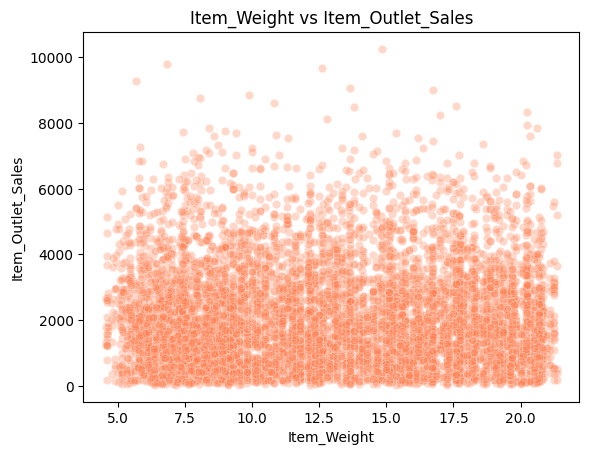

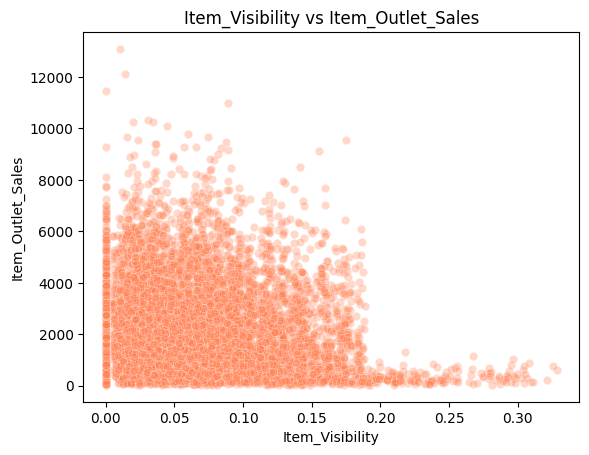

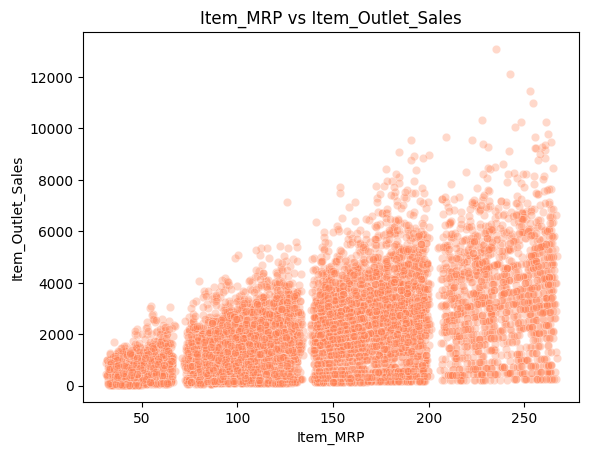

In [20]:
#Item Weight VS Item Outlet Sales
sns.scatterplot(data=EDA_df,x='Item_Weight',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Item_Weight vs Item_Outlet_Sales')
plot.xlabel('Item_Weight')
plot.ylabel('Item_Outlet_Sales')
plot.show()

#Item Visibility VS Item Outlet Sales
sns.scatterplot(data=EDA_df,x='Item_Visibility',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Item_Visibility vs Item_Outlet_Sales')
plot.xlabel('Item_Visibility')
plot.ylabel('Item_Outlet_Sales')
plot.show()


#Item MRP VS Item Outlet Sales
sns.scatterplot(data=EDA_df,x='Item_MRP',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Item_MRP vs Item_Outlet_Sales')
plot.xlabel('Item_MRP')
plot.ylabel('Item_Outlet_Sales')
plot.show()

# Exploration Of Categorical Variable With Target Variable " Item_Outlet_Sales "

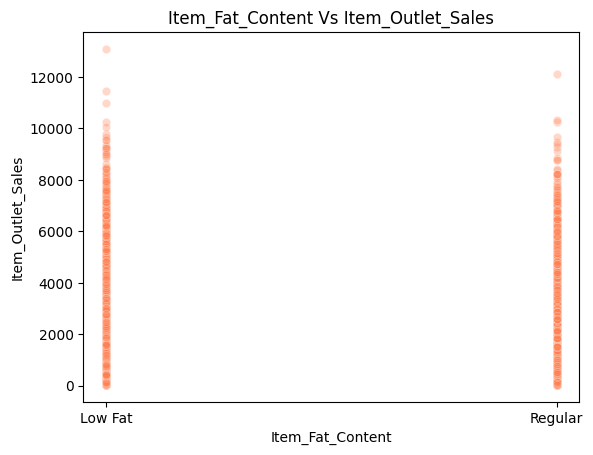

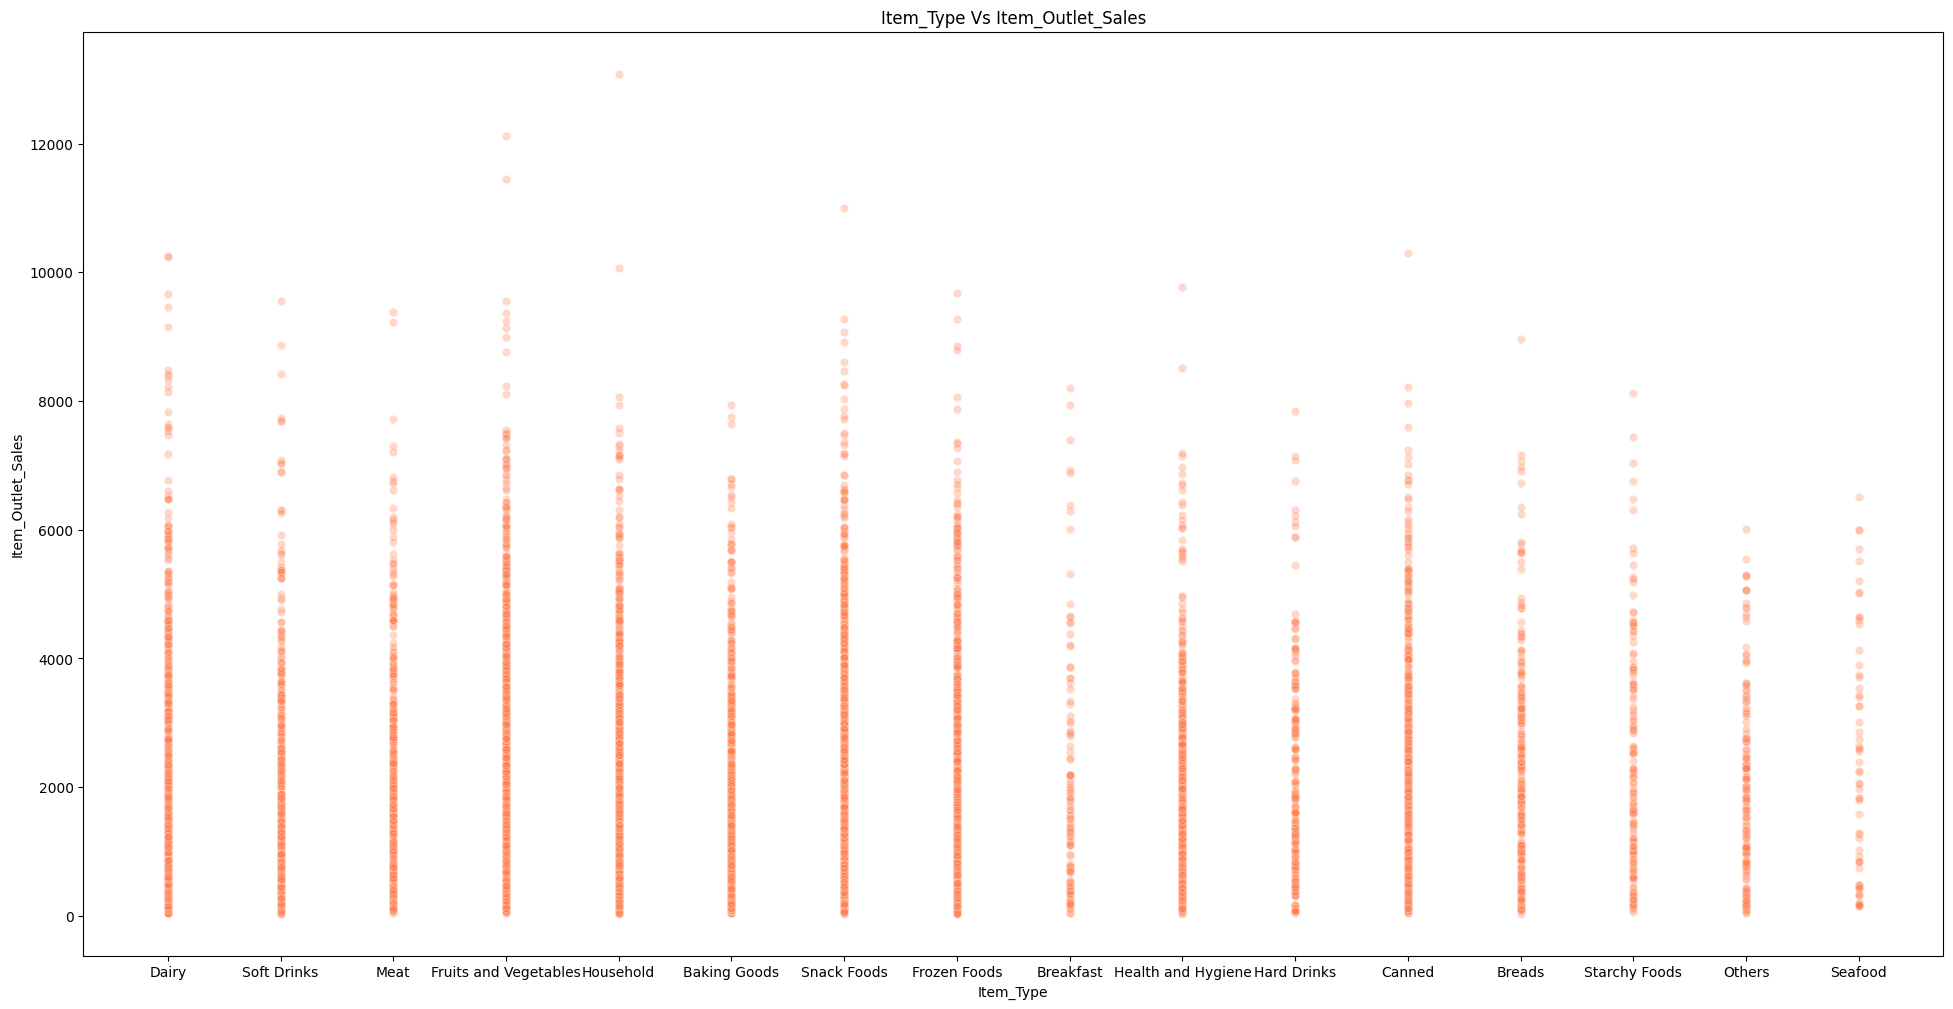

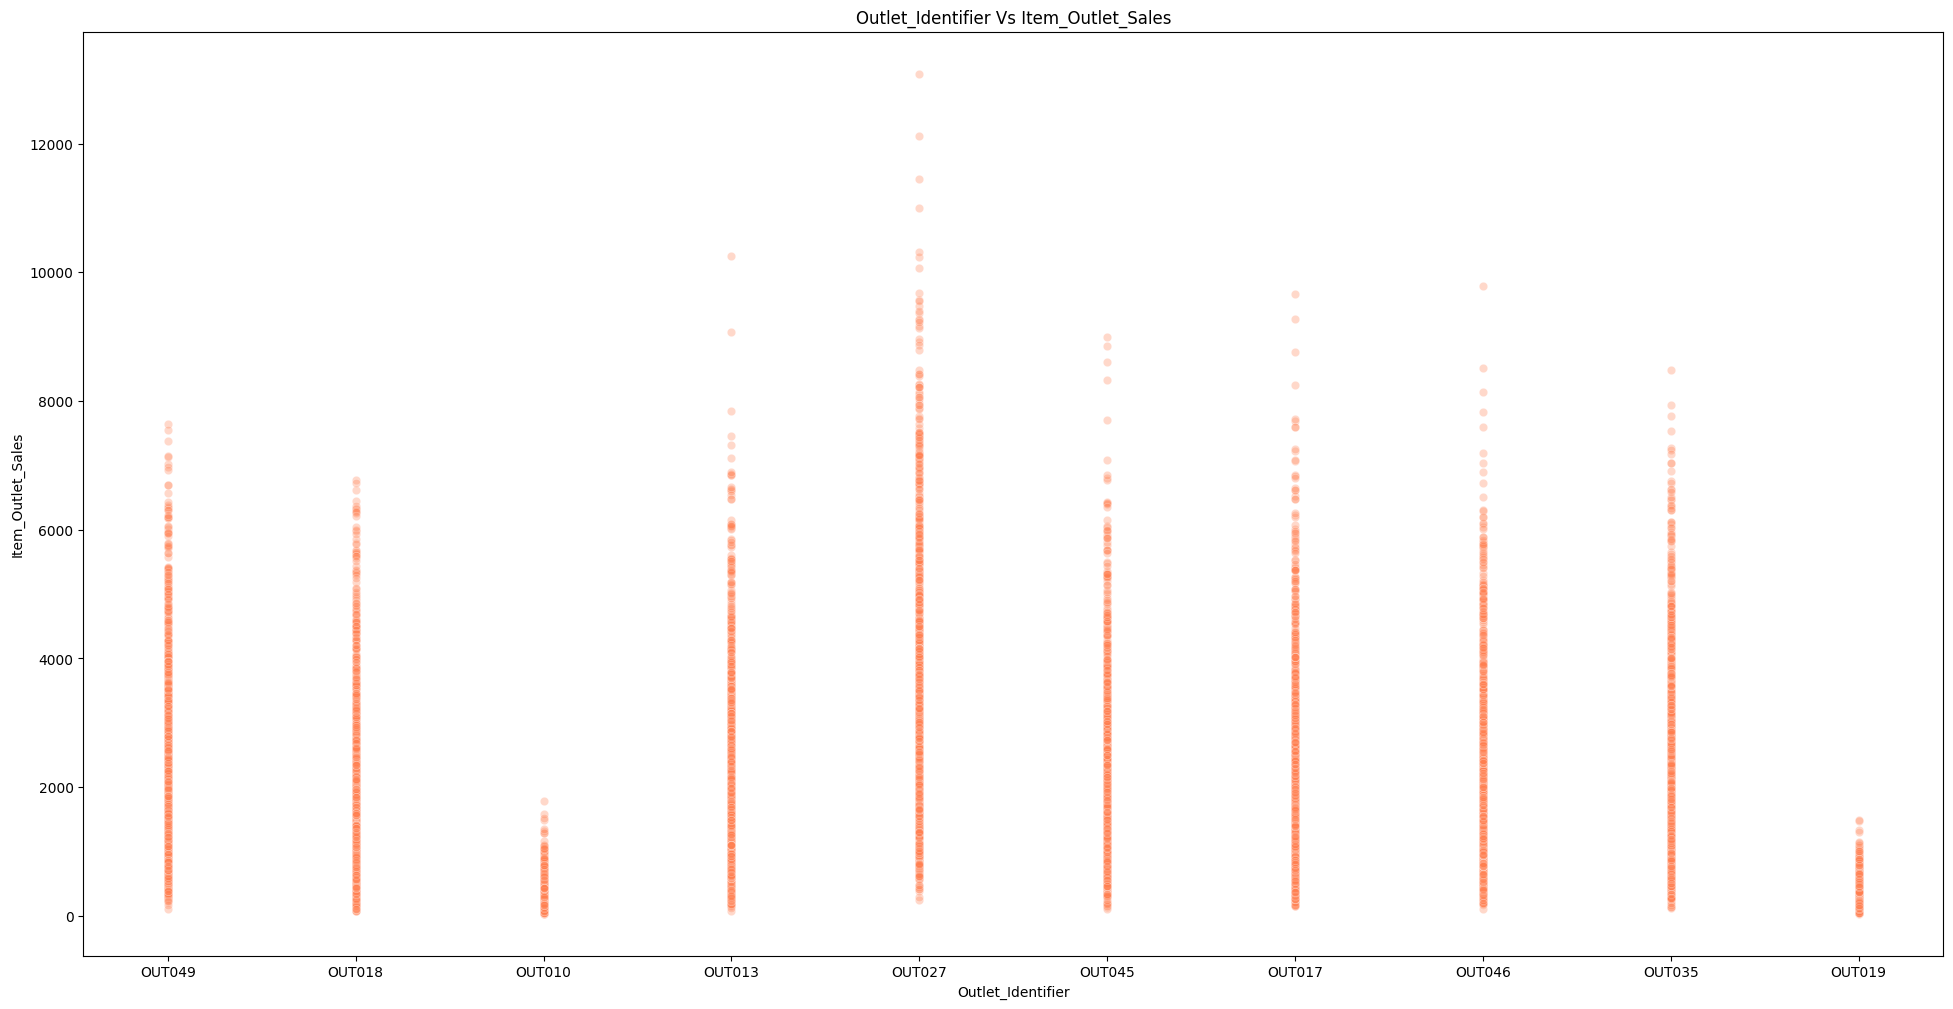

In [21]:
#Item_Fat_Content Vs Item_Outlet_Sales
sns.scatterplot(data=EDA_df,x='Item_Fat_Content',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Item_Fat_Content Vs Item_Outlet_Sales')
plot.xlabel('Item_Fat_Content')
plot.ylabel('Item_Outlet_Sales')
plot.show()

#Item_Type Vs Item_Outlet_Sales
plot.figure(figsize=(24,12))
sns.scatterplot(data=EDA_df,x='Item_Type',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Item_Type Vs Item_Outlet_Sales')
plot.xlabel('Item_Type')
plot.ylabel('Item_Outlet_Sales')
plot.show()

#Outlet_Identifier Vs Item_Outlet_Sales
plot.figure(figsize=(24,12))
sns.scatterplot(data=EDA_df,x='Outlet_Identifier',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Outlet_Identifier Vs Item_Outlet_Sales')
plot.xlabel('Outlet_Identifier')
plot.ylabel('Item_Outlet_Sales')
plot.show()

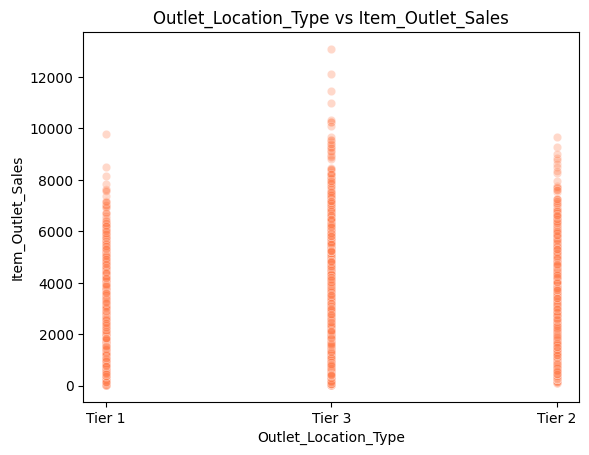

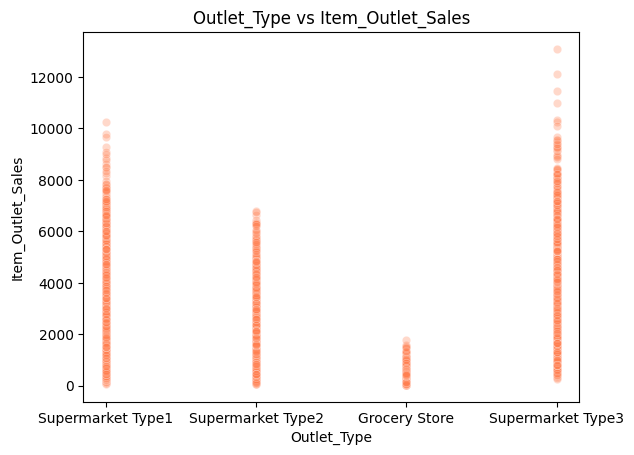

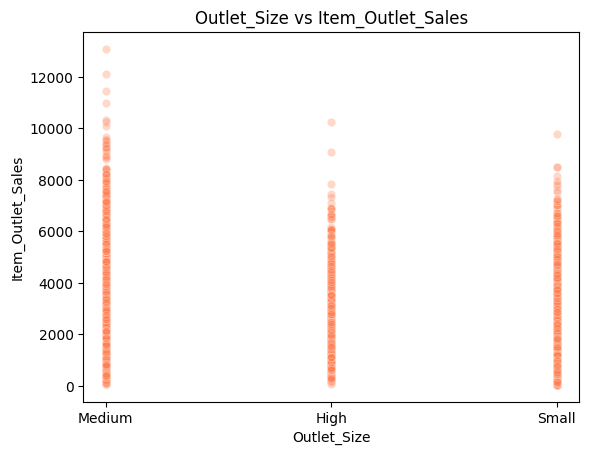

In [22]:
sns.scatterplot(data=EDA_df,x='Outlet_Location_Type',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Outlet_Location_Type vs Item_Outlet_Sales')
plot.xlabel('Outlet_Location_Type')
plot.ylabel('Item_Outlet_Sales')
plot.show()

sns.scatterplot(data=EDA_df,x='Outlet_Type',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title('Outlet_Type vs Item_Outlet_Sales')
plot.xlabel('Outlet_Type')
plot.ylabel('Item_Outlet_Sales')
plot.show()

sns.scatterplot(data=EDA_df,x='Outlet_Size',y='Item_Outlet_Sales',color='coral',alpha=0.3)
plot.title("Outlet_Size vs Item_Outlet_Sales")
plot.xlabel("Outlet_Size")
plot.ylabel("Item_Outlet_Sales")
plot.show()

In [23]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


# Filling NaN Values

Null Values Are Present In The Following Features 
    Item_Weight,
    Outlet_Size ,
    Item_Outlet_Sales

In [24]:
prep_df = EDA_df

In [25]:
prep_df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [26]:
prep_df['Outlet_Size'].isna().sum()

4016

- As the count of null values and small values are close , we can replace Outlet_Size 'NaN' Values with 'Small' Value

# Replacing Outlet_Size NaN Values With 'Small' Value

In [27]:
prep_df['Outlet_Size'] = prep_df['Outlet_Size'].fillna('Small')

In [28]:
prep_df['Outlet_Size'].isna().sum()

0

# Imputing Item_Weight Null Values With Mean

In [29]:
prep_df['Item_Weight'].isna().sum()

2439

In [30]:
mean = prep_df['Item_Weight'].mean()
prep_df['Item_Weight']=prep_df['Item_Weight'].fillna(mean)

In [31]:
prep_df['Item_Weight'].isna().sum()

0

# Item_Outlet_Sales

In [32]:
prep_df['Item_Outlet_Sales'].isna().sum()

5681

In [33]:
prep_df.shape

(14204, 12)

# Replacing Item_Visibility - 0 Values With Mean Of Common Item_Identifier

In [34]:
group_df = prep_df[prep_df['Item_Identifier']=='FDX07']
group_df[['Item_Identifier','Item_Visibility']]

,Item_Identifier,Item_Visibility
3,FDX07,0.000000
1491,FDX07,0.022914
2459,FDX07,0.022965
3089,FDX07,0.000000
5906,FDX07,0.022954
7735,FDX07,0.022808
9054,FDX07,0.023048
12074,FDX07,0.022919
12561,FDX07,0.022900


In [35]:
for item in prep_df['Item_Identifier'].unique():
    mean_visibility=prep_df.loc[(prep_df['Item_Identifier']==item)&(prep_df['Item_Visibility']!=0),'Item_Visibility'].mean()
    mean_visibility = round(mean_visibility,6)
    prep_df.loc[(prep_df['Item_Identifier']==item)&(prep_df['Item_Visibility']==0),'Item_Visibility']=mean_visibility

In [36]:
group_df = prep_df[prep_df['Item_Identifier']=='NCD19']
group_df[['Item_Identifier','Item_Visibility']]

,Item_Identifier,Item_Visibility
4,NCD19,0.014670
522,NCD19,0.022060
802,NCD19,0.014670
2129,NCD19,0.013179
2907,NCD19,0.013254
3428,NCD19,0.014670
8672,NCD19,0.013116
10467,NCD19,0.013177
13900,NCD19,0.013233


Text(0, 0.5, 'Count')

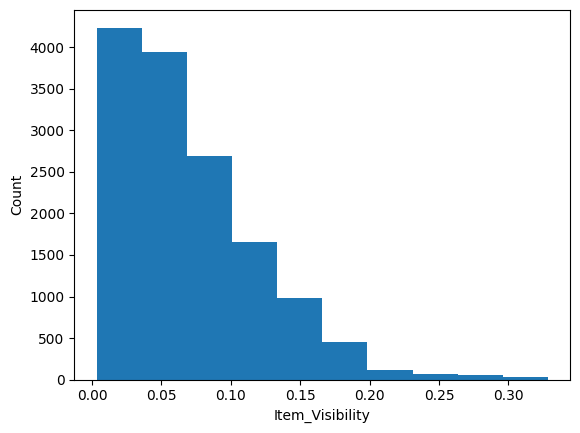

In [37]:
plot.figsize=(12,8)
plot.hist(prep_df['Item_Visibility'])
plot.xlabel('Item_Visibility')
plot.ylabel('Count')

# Feature Engineering

In [38]:
feature_df = prep_df

In [39]:
feature_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
feature_df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

# Item_Type - Is further grouped into perishable and non-perishable

In [41]:
perishable     = ("Breads","Breakfast","Dairy","Fruits and Vegetable","Meat","Seafood")
non_perishable = ("Baking Goods","Canned","Frozen Foods","Hard Drinks","Health and Hygiene","Household","Soft Drinks")
feature_df['Item_Type_new'] = feature_df['Item_Type'].apply(lambda
                                                           x: 'perishable' if x in perishable
                                                           else'non_perishable' if x in non_perishable
                                                           else 'not_sure')

In [42]:
feature_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,not_sure
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable


# Item Category - New Column Created Considering Only 2 letters from Item_Identifier

In [43]:
feature_df['Item_Category'] = feature_df['Item_Identifier'].str[:2]

In [44]:
feature_df['Item_Category']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Category, Length: 14204, dtype: object

FD - Food , DR -Drink , NC - Non -Consumable

In [45]:
crosstab = pd.crosstab(feature_df['Item_Type'],feature_df['Item_Identifier'].str[:2])
print(crosstab)

Item_Identifier         DR    FD    NC
Item_Type                             
Baking Goods             0  1086     0
Breads                   0   416     0
Breakfast                0   186     0
Canned                   0  1084     0
Dairy                  229   907     0
Frozen Foods             0  1426     0
Fruits and Vegetables    0  2013     0
Hard Drinks            362     0     0
Health and Hygiene       0     0   858
Household                0     0  1548
Meat                     0   736     0
Others                   0     0   280
Seafood                  0    89     0
Snack Foods              0  1989     0
Soft Drinks            726     0     0
Starchy Foods            0   269     0


In [46]:
feature_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,not_sure,FD
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,NC


# Replacing Non-Consumable Item_Fat_Content To Non-Edible

In [47]:
feature_df.loc[feature_df['Item_Category'] == 'NC','Item_Fat_Content']='Non-Edible'

In [48]:
feature_df[['Item_Fat_Content','Item_Category']]

,Item_Fat_Content,Item_Category
0,Low Fat,FD
1,Regular,DR
2,Low Fat,FD
3,Regular,FD
4,Non-Edible,NC
...,...,...
14199,Regular,FD
14200,Regular,FD
14201,Non-Edible,NC
14202,Regular,FD


# Created New Column Outlet_Years

In [49]:
feature_df['Outlet_Years'] = 2013 - feature_df['Outlet_Establishment_Year']
feature_df['Outlet_Establishment_Year'] = feature_df['Outlet_Establishment_Year'].astype('category')

In [50]:
feature_df[['Outlet_Years','Outlet_Establishment_Year']]

,Outlet_Years,Outlet_Establishment_Year
0,14,1999
1,4,2009
2,14,1999
3,15,1998
4,26,1987
...,...,...
14199,16,1997
14200,4,2009
14201,11,2002
14202,6,2007


# Creating New Column Price_per_unit_wt

In [51]:
feature_df['Price_per_unit_wt'] =feature_df['Item_MRP']/feature_df['Item_Weight']

In [52]:
feature_df[['Item_MRP','Item_Weight','Price_per_unit_wt']]

,Item_MRP,Item_Weight,Price_per_unit_wt
0,249.8092,9.30,26.861204
1,48.2692,5.92,8.153581
2,141.6180,17.50,8.092457
3,182.0950,19.20,9.484115
4,53.8614,8.93,6.031512
...,...,...,...
14199,141.3154,10.50,13.458610
14200,169.1448,7.60,22.255895
14201,118.7440,10.00,11.874400
14202,214.6218,15.30,14.027569


# Clustering Item_MRP_Clusters into 4 clusters

In [53]:
feature_df['Item_MRP_Clusters'] = pd.cut(feature_df['Item_MRP'],
                                        bins=[0,69,136,203,float('inf')],
                                        labels=['1','2','3','4'],
                                        include_lowest=True)

In [54]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  object  
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  object  
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  object  
 7   Outlet_Establishment_Year  14204 non-null  category
 8   Outlet_Size                14204 non-null  object  
 9   Outlet_Location_Type       14204 non-null  object  
 10  Outlet_Type                14204 non-null  object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Item_Type_new              14204 non-null  object  
 13  Item_Category              1420

Note:
-Only Item_Outlet_Sales contains null values because we concatenated the training and test datasets. Since Item_Outlet_Sales is the target variable, it naturally lacks values in the test set, as that is the variable we are predicting. Rest all other features are free from null values.

In [55]:
feature_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category,Outlet_Years,Price_per_unit_wt,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,14,26.861204,4
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,DR,4,8.153581,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,14,8.092457,3
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,not_sure,FD,15,9.484115,3
4,NCD19,8.93,Non-Edible,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,NC,26,6.031512,1


In [56]:
feature_df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [57]:
feature_df['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

# Creating New Column To Convert Categorical Outlet_Location_Type To Numerical Outlet_Location_Type_Num

In [58]:
feature_df['Outlet_Location_Type_Num'] = feature_df['Outlet_Location_Type'].map({'Tier 3':0,'Tier 2':1,'Tier 1':2})
                                       

# Creating New Column To Convert Categorical Outlet_Size To Numerical Outlet_Size_Num

In [59]:
feature_df['Outlet_Size_Num'] = feature_df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
                                       

In [60]:
feature_df.drop(['Outlet_Size','Outlet_Location_Type'],axis=1,inplace=True)

In [61]:
feature_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category,Outlet_Years,Price_per_unit_wt,Item_MRP_Clusters,Outlet_Location_Type_Num,Outlet_Size_Num
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,perishable,FD,14,26.861204,4,2,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,non_perishable,DR,4,8.153581,1,0,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700,perishable,FD,14,8.092457,3,2,1
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800,not_sure,FD,15,9.484115,3,0,0
4,NCD19,8.93,Non-Edible,0.014670,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052,non_perishable,NC,26,6.031512,1,0,2


# Using One Hot Encoder - To Convert Categorical Into Numerical

In [62]:
from sklearn.preprocessing import OneHotEncoder
ohecol = ['Outlet_Establishment_Year','Item_Fat_Content','Item_Type_new','Item_Category','Item_MRP_Clusters' ]
oe_df = pd.get_dummies(feature_df[ohecol],  prefix = [ 'Outlet_Establishment_Year','Item_Fat_Content','Item_Type_new','Item_Category','Item_MRP_Clusters'])                                     

In [63]:
final_df=feature_df.join(oe_df)

In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 14203
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Item_Identifier                 14204 non-null  object  
 1   Item_Weight                     14204 non-null  float64 
 2   Item_Fat_Content                14204 non-null  object  
 3   Item_Visibility                 14204 non-null  float64 
 4   Item_Type                       14204 non-null  object  
 5   Item_MRP                        14204 non-null  float64 
 6   Outlet_Identifier               14204 non-null  object  
 7   Outlet_Establishment_Year       14204 non-null  category
 8   Outlet_Type                     14204 non-null  object  
 9   Item_Outlet_Sales               8523 non-null   float64 
 10  Item_Type_new                   14204 non-null  object  
 11  Item_Category                   14204 non-null  object  
 12  Outlet_Years      

In [65]:
final_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,...,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_MRP_Clusters_1,Item_MRP_Clusters_2,Item_MRP_Clusters_3,Item_MRP_Clusters_4
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,...,0,0,1,0,1,0,0,0,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,...,1,0,0,1,0,0,1,0,0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Supermarket Type1,2097.2700,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,732.3800,...,0,1,0,0,1,0,0,0,1,0
4,NCD19,8.93,Non-Edible,0.014670,Household,53.8614,OUT013,1987,Supermarket Type1,994.7052,...,1,0,0,0,0,1,1,0,0,0


In [66]:
#feature_df = pd.get_dummies(feature_df,columns=['Item_Identifier'],prefix='Item_ID_')

# Feature Scaling

In [67]:
import numpy as np
final_df['Item_Visibility'] = np.log1p(final_df['Item_Visibility'])
final_df['Price_per_unit_wt'] = np.log1p(final_df['Price_per_unit_wt'])
final_df['Item_Outlet_Sales'] = np.log1p(final_df['Item_Outlet_Sales'])

In [68]:
final_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,...,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_MRP_Clusters_1,Item_MRP_Clusters_2,Item_MRP_Clusters_3,Item_MRP_Clusters_4
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Supermarket Type1,8.225808,...,0,0,1,0,1,0,0,0,0,1
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,6.096776,...,1,0,0,1,0,0,1,0,0,0
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Supermarket Type1,7.648868,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.20,Regular,0.022671,Fruits and Vegetables,182.0950,OUT010,1998,Grocery Store,6.597664,...,0,1,0,0,1,0,0,0,1,0
4,NCD19,8.93,Non-Edible,0.014563,Household,53.8614,OUT013,1987,Supermarket Type1,6.903451,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013406,Snack Foods,141.3154,OUT046,1997,Supermarket Type1,NaN,...,0,1,0,0,1,0,0,0,1,0
14200,FDD47,7.60,Regular,0.133648,Starchy Foods,169.1448,OUT018,2009,Supermarket Type2,NaN,...,0,1,0,0,1,0,0,0,1,0
14201,NCO17,10.00,Non-Edible,0.070951,Health and Hygiene,118.7440,OUT045,2002,Supermarket Type1,NaN,...,1,0,0,0,0,1,0,1,0,0
14202,FDJ26,15.30,Regular,0.093672,Canned,214.6218,OUT017,2007,Supermarket Type1,NaN,...,1,0,0,0,1,0,0,0,0,1


In [69]:
final_df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content                    object
Item_Visibility                    float64
Item_Type                           object
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year         category
Outlet_Type                         object
Item_Outlet_Sales                  float64
Item_Type_new                       object
Item_Category                       object
Outlet_Years                         int64
Price_per_unit_wt                  float64
Item_MRP_Clusters                 category
Outlet_Location_Type_Num             int64
Outlet_Size_Num                      int64
Outlet_Establishment_Year_1985       uint8
Outlet_Establishment_Year_1987       uint8
Outlet_Establishment_Year_1997       uint8
Outlet_Establishment_Year_1998       uint8
Outlet_Establishment_Year_1999       uint8
Outlet_Establishment_Year_2002       uint8
Outlet_Esta

In [70]:
num_features=final_df.select_dtypes(include='number').columns.tolist()
df_numeric= final_df[num_features]

In [71]:
df_numeric.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Price_per_unit_wt,Outlet_Location_Type_Num,Outlet_Size_Num,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,...,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC,Item_MRP_Clusters_1,Item_MRP_Clusters_2,Item_MRP_Clusters_3,Item_MRP_Clusters_4
0,9.30,0.015920,249.8092,8.225808,14,3.327235,2,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,5.92,0.019095,48.2692,6.096776,4,2.214145,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,17.50,0.016621,141.6180,7.648868,14,2.207445,2,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,19.20,0.022671,182.0950,6.597664,15,2.349861,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,8.93,0.014563,53.8614,6.903451,26,1.950402,0,2,0,1,...,1,0,0,0,0,1,1,0,0,0


In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_df= scaler.fit_transform(df_numeric)

In [73]:
scaled_df = pd.DataFrame(scaled_df,columns=num_features)

In [74]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item_Weight                     14204 non-null  float64
 1   Item_Visibility                 14204 non-null  float64
 2   Item_MRP                        14204 non-null  float64
 3   Item_Outlet_Sales               8523 non-null   float64
 4   Outlet_Years                    14204 non-null  float64
 5   Price_per_unit_wt               14204 non-null  float64
 6   Outlet_Location_Type_Num        14204 non-null  float64
 7   Outlet_Size_Num                 14204 non-null  float64
 8   Outlet_Establishment_Year_1985  14204 non-null  float64
 9   Outlet_Establishment_Year_1987  14204 non-null  float64
 10  Outlet_Establishment_Year_1997  14204 non-null  float64
 11  Outlet_Establishment_Year_1998  14204 non-null  float64
 12  Outlet_Establishment_Year_1999  

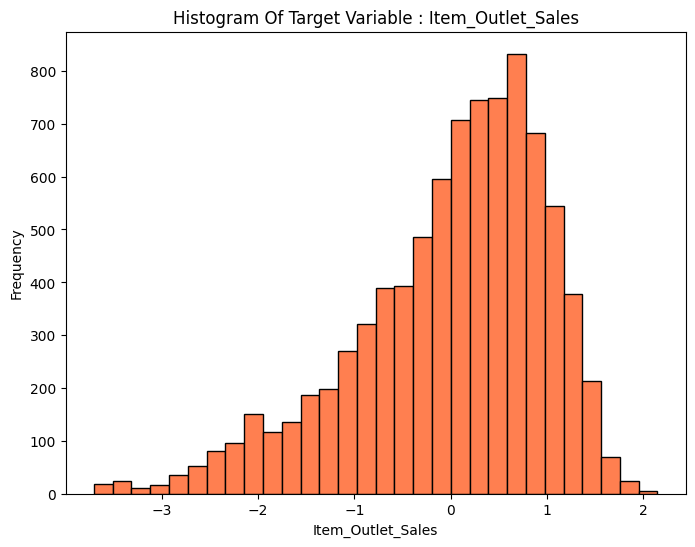

In [75]:
plot.figure(figsize=(8,6))
plot.hist(scaled_df['Item_Outlet_Sales'],bins=30,color='coral',edgecolor='black')
plot.title('Histogram Of Target Variable : Item_Outlet_Sales')
plot.xlabel('Item_Outlet_Sales')
plot.ylabel('Frequency')
plot.show()

In [76]:
#final_df.drop(num_features,axis=1,inplace=True)

In [77]:
scaled_df = scaled_df.iloc[:len(train)]

In [78]:
scaled_df.shape

(8523, 30)

In [79]:
X= scaled_df.drop('Item_Outlet_Sales',axis=1)
y=scaled_df['Item_Outlet_Sales']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [81]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.7406282607404595

In [ ]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
steps = [
            ('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training Score  : {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, y_test)))